In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

In [5]:
data_dir = '/home/pavel/P/kaggle_data/expedia'

In [6]:
train_dtypes = {'site_name': np.int8, 'posa_continent': np.int8, 
                'user_location_country': np.int16, 'user_location_region': np.int16, 
                'user_location_city': np.int32, 'orig_destination_distance': np.float64, 
                'user_id': np.int32, 'is_mobile': np.bool, 'is_package': np.bool,
                'channel': np.int8, 'srch_adults_cnt': np.int8, 'srch_children_cnt': np.int8,
                'srch_rm_cnt': np.int8, 'srch_destination_id': np.int32, 
                'srch_destination_type_id': np.int8, 'is_booking': np.bool, 
                'cnt': np.int16, 'hotel_continent': np.int8, 'hotel_country': np.int16, 
                'hotel_market': np.int16, 'hotel_cluster': np.int8}

In [7]:
train = pd.read_csv(os.path.join(data_dir, 'train_booking.csv'), dtype=train_dtypes)
# test = pd.read_csv(os.path.join(data_dir, 'test.csv'))
# destinations = pd.read_csv(os.path.join(data_dir, 'destinations.csv'))

In [5]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [9]:
# test.head()

In [10]:
# destinations.head()

### Посмотрим что за данные лежат в таблицах 

| Column name | Description | Data type |
|--|--------------------------|
| date_time | Timestamp | string |
| site_name | ID of the Expedia point of sale (i.e. Expedia.com, Expedia.co.uk, Expedia.co.jp, ...) | 	int |
| posa_continent | 	ID of continent associated with site_name | 	int |
| user_location_country | 	The ID of the country the customer is located | 	int |
| user_location_region | 	The ID of the region the customer is located | 	int |
| user_location_city | 	The ID of the city the customer is located | 	int |
| orig_destination_distance | 	Physical distance between a hotel and a customer at the time of search. A null means the distance could not be calculated | 	double |
| user_id | ID of user | 	int |
| is_mobile | 	1 when a user connected from a mobile device, 0 otherwise | 	tinyint |
| is_package | 	1 if the click/booking was generated as a part of a package (i.e. combined with a flight), 0 otherwise | int |
| channel | 	ID of a marketing channel | 	int |
| srch_ci | 	Checkin date | 	string |
| srch_co | 	Checkout date | 	string |
| srch_adults_cnt | 	The number of adults specified in the hotel room | 	int |
| srch_children_cnt | 	The number of (extra occupancy) children specified in the hotel room | 	int |
| srch_rm_cnt | 	The number of hotel rooms specified in the search | 	int |
| srch_destination_id | 	ID of the destination where the hotel search was performed | 	int |
| srch_destination_type_id | 	Type of destination | 	int |
| hotel_continent | 	Hotel continent | 	int |
| hotel_country | 	Hotel country | 	int |
| hotel_market | 	Hotel market | 	int |
| is_booking | 	1 if a booking, 0 if a click | 	tinyint |
| cnt | 	Numer of similar events in the context of the same user session | 	bigint |
| hotel_cluster | ID of a hotel cluster | int |

In [9]:
train.describe()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,3.000693e+06,3.000693e+06,3.000693e+06,3.000693e+06,3.000693e+06,1.985514e+06,3.000693e+06,3.000693e+06,3.000693e+06,3.000693e+06,...,3.000693e+06,3.000693e+06,3.000693e+06,3.000693e+06,3000693.0,3.000693e+06,3.000693e+06,3.000693e+06,3.000693e+06,3.000693e+06
mean,9.373060e+00,2.705199e+00,8.762437e+01,3.129063e+02,2.788012e+04,1.688682e+03,6.066209e+05,9.921275e-02,1.366978e-01,6.179528e+00,...,2.767444e-01,1.129579e+00,1.537985e+04,2.878473e+00,1.0,1.015258e+00,3.012147e+00,8.054304e+01,6.212616e+02,4.769069e+01
std,1.191513e+01,7.296438e-01,5.901820e+01,2.044980e+02,1.673100e+04,2.157340e+03,3.493174e+05,2.989475e-01,3.435280e-01,3.610034e+00,...,6.556351e-01,4.786223e-01,1.163909e+04,2.210588e+00,0.0,1.436803e-01,1.619683e+00,5.491476e+01,4.921910e+02,2.903937e+01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e-03,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.000000e+00,6.600000e+01,1.740000e+02,1.340000e+04,2.192807e+02,3.047260e+05,0.000000e+00,0.000000e+00,2.000000e+00,...,0.000000e+00,1.000000e+00,8.262000e+03,1.000000e+00,1.0,1.000000e+00,2.000000e+00,5.000000e+01,2.450000e+02,2.200000e+01
50%,2.000000e+00,3.000000e+00,6.600000e+01,3.140000e+02,2.765500e+04,8.057841e+02,6.068950e+05,0.000000e+00,0.000000e+00,9.000000e+00,...,0.000000e+00,1.000000e+00,1.192200e+04,1.000000e+00,1.0,1.000000e+00,2.000000e+00,5.000000e+01,6.280000e+02,4.700000e+01
75%,1.100000e+01,3.000000e+00,6.900000e+01,3.950000e+02,4.250000e+04,2.227812e+03,9.101020e+05,0.000000e+00,0.000000e+00,9.000000e+00,...,0.000000e+00,1.000000e+00,2.185500e+04,6.000000e+00,1.0,1.000000e+00,4.000000e+00,1.050000e+02,7.140000e+02,7.200000e+01
max,5.300000e+01,4.000000e+00,2.390000e+02,1.027000e+03,5.650700e+04,1.219917e+04,1.198784e+06,1.000000e+00,1.000000e+00,1.000000e+01,...,9.000000e+00,8.000000e+00,6.510400e+04,9.000000e+00,1.0,2.100000e+01,6.000000e+00,2.120000e+02,2.117000e+03,9.900000e+01


#### Соотношение кликов и бронирования

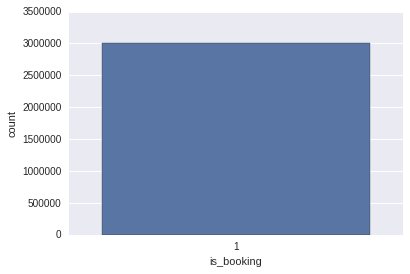

In [10]:
sns.countplot(x='is_booking', data=train)

#### Отели по континентам

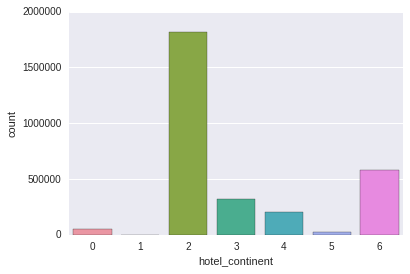

In [11]:
sns.countplot(x='hotel_continent', data=train)

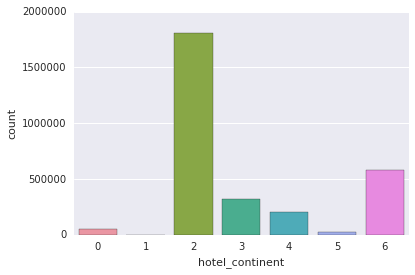

In [14]:
sns.countplot(x='hotel_continent', data=train[train['is_booking']==1])

#### Отели по странам

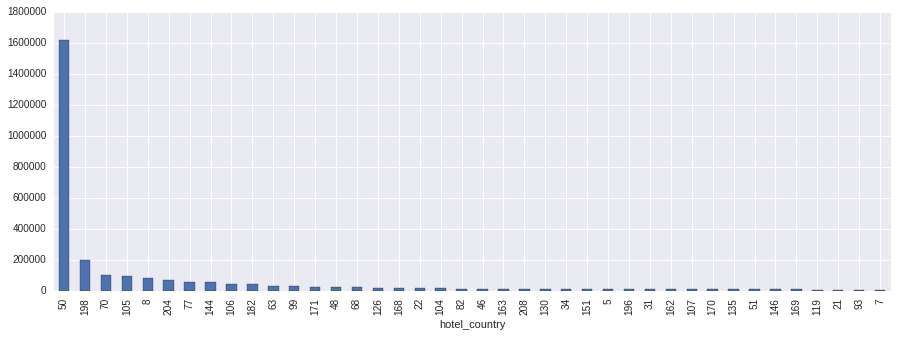

In [12]:
# топ-40
train.pivot_table('is_booking', 'hotel_country', aggfunc='count')\
    .sort_values(ascending=False)\
    .head(40)\
    .plot(kind='bar', figsize=(15,5))

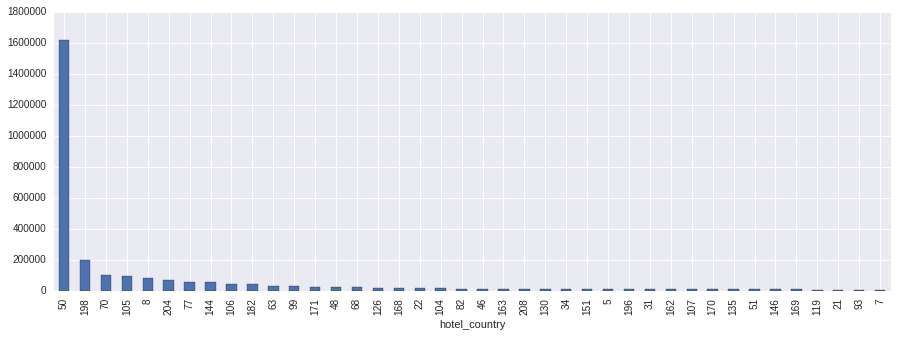

In [13]:
# топ-40
train[train['is_booking']==1].pivot_table('is_booking', 'hotel_country', aggfunc='count')\
    .sort_values(ascending=False)\
    .head(40)\
    .plot(kind='bar', figsize=(15,5))

#### Кластеры

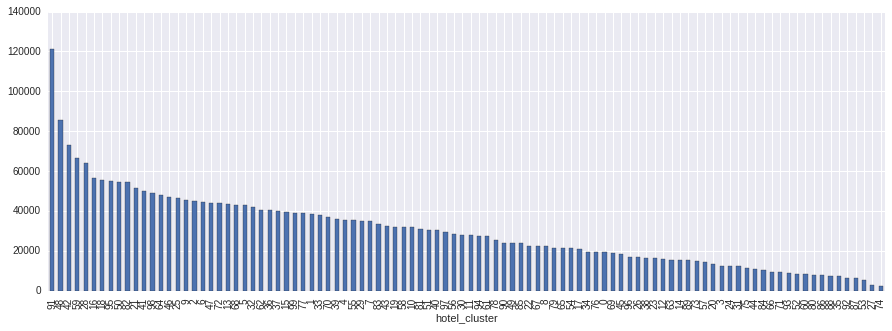

In [14]:
train.pivot_table('is_booking', 'hotel_cluster', aggfunc='count')\
    .sort_values(ascending=False)\
    .plot(kind='bar', figsize=(15,5))

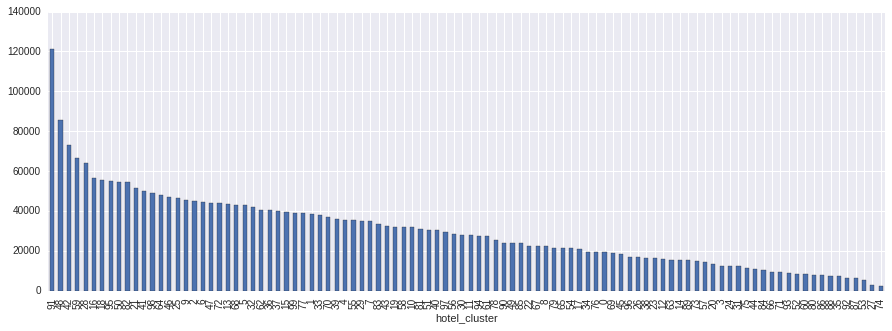

In [15]:
train[train['is_booking']==1].pivot_table('is_booking', 'hotel_cluster', aggfunc='count')\
    .sort_values(ascending=False)\
    .plot(kind='bar', figsize=(15,5))

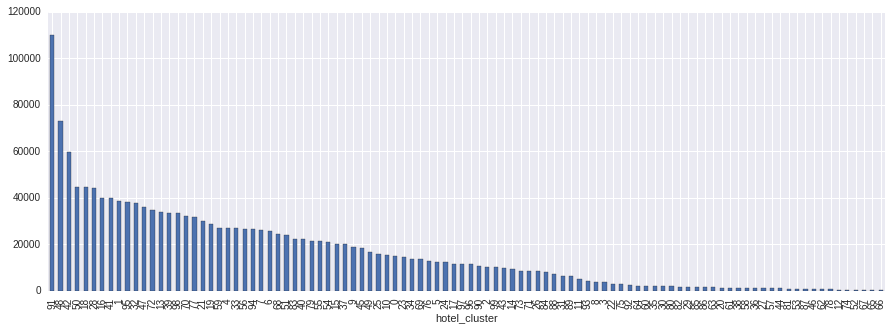

In [16]:
train[(train['is_booking']==1) & (train['hotel_country']==50)]\
    .pivot_table('is_booking', 'hotel_cluster', aggfunc='count')\
    .sort_values(ascending=False)\
    .plot(kind='bar', figsize=(15,5))

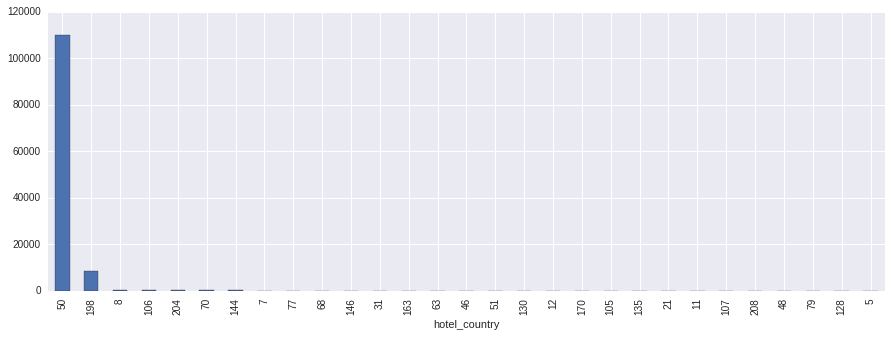

In [17]:
train[(train['is_booking']==1) & (train['hotel_cluster']==91)]\
    .pivot_table('is_booking', 'hotel_country', aggfunc='count')\
    .sort_values(ascending=False)\
    .plot(kind='bar', figsize=(15,5))

#### Кол-во кластеров по site_name

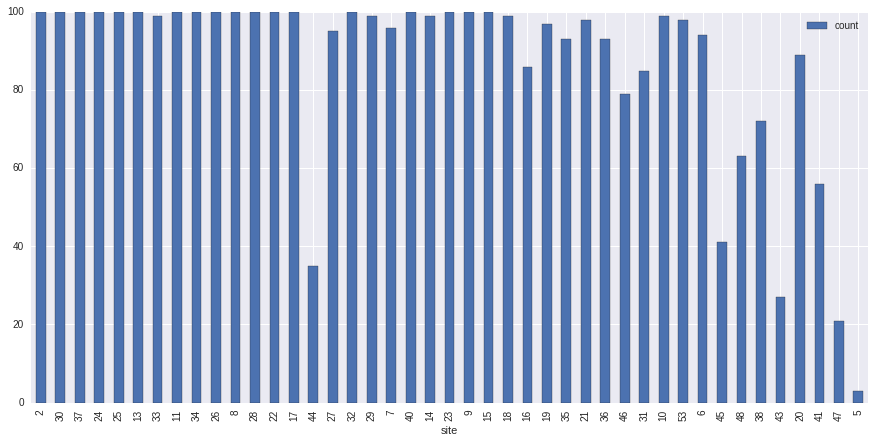

In [20]:
all_sites = train.site_name.unique()
res = []
for _site in all_sites:
    res.append({'count':train[train['site_name']==_site].hotel_cluster.unique().shape[0], 'site': _site})
pd.DataFrame(res).plot(kind='bar', figsize={15, 7}, x='site', y='count')

#### Кол-во кластеров по user_location_country

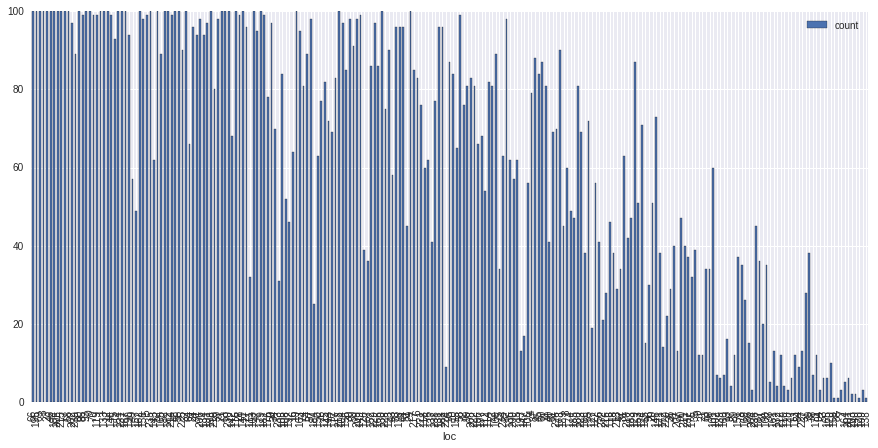

In [21]:
all_c = train.user_location_country.unique()
res = []
for _c in all_c:
    res.append({'count':train[train['user_location_country']==_c].hotel_cluster.unique().shape[0], 'loc': _c})
pd.DataFrame(res).plot(kind='bar', figsize={15, 7}, x='loc', y='count')

#### Проверим корреляцию между id кластера и его популярностью

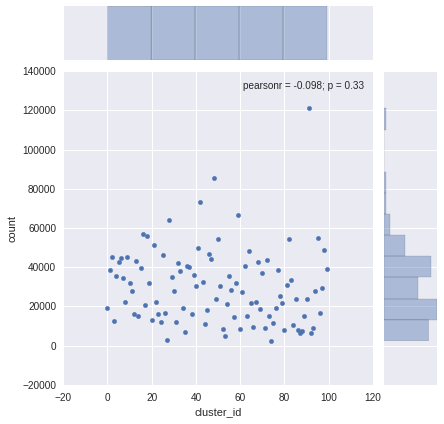

In [22]:
res = []
all_c = train.hotel_cluster.unique()
for cluster in all_c:
    res.append({'cluster_id': cluster, 'count':train[(train['hotel_cluster']==cluster) & 
                                                     (train['is_booking']==1)].shape[0]})
    
_d = pd.DataFrame(res)
sns.jointplot(x=_d['cluster_id'], y=_d['count'])

#### Разобьем даты месяцы и годы

In [8]:
train[['srch_ci', 'srch_co']].head()

,srch_ci,srch_co
0,2014-08-29,2014-09-02
1,2014-04-18,2014-04-20
2,2013-09-06,2013-09-14
3,2015-06-26,2015-06-28
4,2014-02-22,2014-02-27


In [9]:
srch_ci = np.vstack(train.srch_ci.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
train['ci_year'] = srch_ci[:,0]
train['ci_month'] = srch_ci[:,1]
train['ci_day'] = srch_ci[:,2]

In [10]:
srch_co = np.vstack(train.srch_co.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
train['co_year'] = srch_co[:,0]
train['co_month'] = srch_co[:,1]
train['co_day'] = srch_co[:,2]

In [11]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,hotel_continent,hotel_country,hotel_market,hotel_cluster,ci_year,ci_month,ci_day,co_year,co_month,co_day
0,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,False,True,...,2,50,628,1,2014,8,29,2014,9,2
1,2014-02-27 18:01:32,2,3,66,318,52078,NaN,756,False,True,...,2,50,191,2,2014,4,18,2014,4,20
2,2013-06-15 15:38:05,30,4,195,548,56440,NaN,1048,False,True,...,0,185,185,58,2013,9,6,2013,9,14
3,2014-11-23 18:02:20,30,4,195,991,47725,NaN,1048,False,False,...,3,151,69,36,2015,6,26,2015,6,28
4,2014-01-03 16:30:17,2,3,66,462,41898,2454.8588,1482,False,True,...,2,50,680,95,2014,2,22,2014,2,27
